In [1]:
import random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as py
from numpy import array

In [2]:
file = "brooklyn_sales_map.csv"
file_df = pd.read_csv(file)
file_df.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (40,41,43,45,46,47,86) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,number,borough,neighborhood,building_class_category,tax_class,block,lot,easement,building_class,address,...,EDesigNum,APPBBL,APPDate,PLUTOMapID,FIRM07_FLA,PFIRM15_FL,Version,MAPPLUTO_F,SHAPE_Leng,SHAPE_Area
0,1,3,DOWNTOWN-METROTECH,28 COMMERCIAL CONDOS,4,140,1001,NaN,R5,330 JAY STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,3,DOWNTOWN-FULTON FERRY,29 COMMERCIAL GARAGES,4,54,1,NaN,G7,85 JAY STREET,...,NaN,3.000540e+09,12/6/2002,1.0,NaN,NaN,17V1.1,0.0,1559.889144,140131.57720
2,3,3,BROOKLYN HEIGHTS,21 OFFICE BUILDINGS,4,204,1,NaN,O6,29 COLUMBIA HEIGHTS,...,NaN,0.000000e+00,NaN,1.0,NaN,NaN,17V1.1,0.0,890.718521,34656.44724
3,4,3,MILL BASIN,22 STORE BUILDINGS,4,8470,55,NaN,K6,5120 AVENUE U,...,NaN,0.000000e+00,NaN,1.0,1.0,1.0,17V1.1,0.0,3729.786857,797554.84780
4,5,3,BROOKLYN HEIGHTS,26 OTHER HOTELS,4,230,1,NaN,H8,21 CLARK STREET,...,NaN,0.000000e+00,NaN,1.0,NaN,NaN,17V1.1,0.0,620.761169,21360.14763


In [3]:
file_df.columns

Index(['number', 'borough', 'neighborhood', 'building_class_category',
       'tax_class', 'block', 'lot', 'easement', 'building_class', 'address',
       ...
       'EDesigNum', 'APPBBL', 'APPDate', 'PLUTOMapID', 'FIRM07_FLA',
       'PFIRM15_FL', 'Version', 'MAPPLUTO_F', 'SHAPE_Leng', 'SHAPE_Area'],
      dtype='object', length=111)

In [4]:
building_class_price = file_df[['building_class_category','sale_price','year_of_sale','year_built']]
building_class_price

,building_class_category,sale_price,year_of_sale,year_built
0,28 COMMERCIAL CONDOS,499401179.0,2008,2002
1,29 COMMERCIAL GARAGES,345000000.0,2016,0
2,21 OFFICE BUILDINGS,340000000.0,2016,1924
3,22 STORE BUILDINGS,276947000.0,2012,1970
4,26 OTHER HOTELS,202500000.0,2017,1927
...,...,...,...,...
390878,31 COMMERCIAL VACANT LAND,805000.0,2006,2006
390879,31 COMMERCIAL VACANT LAND,330000.0,2006,2006
390880,41 TAX CLASS 4 - OTHER,150000.0,2006,0
390881,04 TAX CLASS 1 CONDOS,346788.0,2006,0


In [5]:
One_family = building_class_price.loc[
                    (building_class_price['building_class_category'] == '01 ONE FAMILY HOMES') &
                                                     (building_class_price['year_of_sale'] == 2000 )|
                    (building_class_price['building_class_category'] == '01 ONE FAMILY HOMES') &
                                                     (building_class_price['year_of_sale'] == 2001 )|
                    (building_class_price['building_class_category'] == '01 ONE FAMILY HOMES') &
                                                     (building_class_price['year_of_sale'] == 2002 )|
                    (building_class_price['building_class_category'] == '01 ONE FAMILY HOMES') &
                                                     (building_class_price['year_of_sale'] == 2003 )|
                    (building_class_price['building_class_category'] == '01 ONE FAMILY HOMES') &
                                                     (building_class_price['year_of_sale'] == 2004 )|
                    (building_class_price['building_class_category'] == '01 ONE FAMILY HOMES') &
                                                     (building_class_price['year_of_sale'] == 2005 )|
                    (building_class_price['building_class_category'] == '01 ONE FAMILY HOMES') &
                                                     (building_class_price['year_of_sale'] == 2006 )|
                    (building_class_price['building_class_category'] == '01 ONE FAMILY HOMES') &
                                                     (building_class_price['year_of_sale'] == 2007 )|
                    (building_class_price['building_class_category'] == '01 ONE FAMILY HOMES') &
                                                     (building_class_price['year_of_sale'] == 2008 )|
                    (building_class_price['building_class_category'] == '01 ONE FAMILY HOMES') &
                                                     (building_class_price['year_of_sale'] == 2009 )|
                    (building_class_price['building_class_category'] == '01 ONE FAMILY HOMES') &
                                                     (building_class_price['year_of_sale'] == 2010 )|
                    (building_class_price['building_class_category'] == '01 ONE FAMILY HOMES') &
                                     (building_class_price['year_of_sale'] == 2011 )|
                    (building_class_price['building_class_category'] == '01 ONE FAMILY HOMES') &
                                     (building_class_price['year_of_sale'] == 2012 )|
                     (building_class_price['building_class_category'] == '01 ONE FAMILY HOMES') &
                                        (building_class_price['year_of_sale'] == 2013 )|
                     (building_class_price['building_class_category'] == '01 ONE FAMILY HOMES') &
                                     (building_class_price['year_of_sale'] == 2014 )|
                     (building_class_price['building_class_category'] == '01 ONE FAMILY HOMES')&
                                     (building_class_price['year_of_sale'] == 2015 )|
                    (building_class_price['building_class_category'] == '01 ONE FAMILY HOMES') & 
                                    (building_class_price['year_of_sale'] == 2016 )|
                  (building_class_price['building_class_category'] == '01 ONE FAMILY HOMES') &
                                     (building_class_price['year_of_sale'] == 2017 )]
one_family_sale = One_family[One_family['sale_price'] > 10000]
sorted_one = one_family_sale.sort_values(by ='year_of_sale',ascending = True)
sorted_one

,building_class_category,sale_price,year_of_sale,year_built
166724,01 ONE FAMILY HOMES,142500.0,2003,2004
125571,01 ONE FAMILY HOMES,365000.0,2003,1925
125570,01 ONE FAMILY HOMES,365000.0,2003,1940
125569,01 ONE FAMILY HOMES,365000.0,2003,1925
31507,01 ONE FAMILY HOMES,995000.0,2003,1899
...,...,...,...,...
28813,01 ONE FAMILY HOMES,1050000.0,2017,1925
152551,01 ONE FAMILY HOMES,230000.0,2017,1920
152552,01 ONE FAMILY HOMES,230000.0,2017,1960
152553,01 ONE FAMILY HOMES,230000.0,2017,1910


In [6]:
df_filter = building_class_price['year_of_sale'].apply(lambda year:year in range(2005,2018))
df_filter


0         True
1         True
2         True
3         True
4         True
          ... 
390878    True
390879    True
390880    True
390881    True
390882    True
Name: year_of_sale, Length: 390883, dtype: bool

In [7]:
test = building_class_price.loc[
                    (building_class_price['building_class_category'] == '01 ONE FAMILY HOMES') &
                                                     (building_class_price['year_of_sale'] > 2000 )]
test.head()

,building_class_category,sale_price,year_of_sale,year_built
576,01 ONE FAMILY HOMES,15500000.0,2015,1931
757,01 ONE FAMILY HOMES,12900000.0,2017,1844
780,01 ONE FAMILY HOMES,12600000.0,2017,1901
798,01 ONE FAMILY HOMES,12400000.0,2015,1899
867,01 ONE FAMILY HOMES,11500000.0,2015,1925


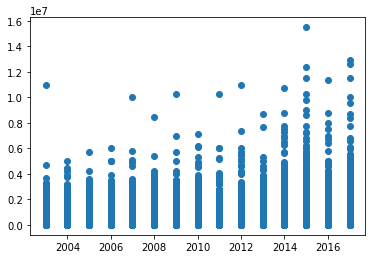

In [8]:
x_new = test['year_of_sale']
y_new = test['sale_price']
plt.scatter(x_new,y_new)
plt.show()

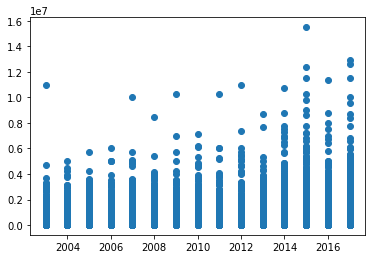

In [9]:
x_axis = sorted_one['year_of_sale']

y_axis = sorted_one['sale_price']
plt.scatter(x_axis,y_axis)
plt.show()

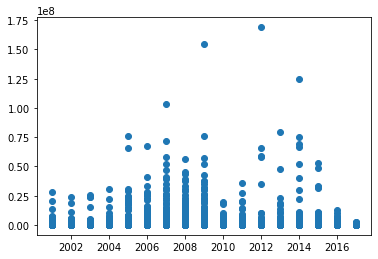

In [15]:
year_built_df = building_class_price[(building_class_price['sale_price'] < 300000000 ) & 
                                     (building_class_price['year_built'] > 2000)]
x_a = year_built_df['year_built']
y_a = year_built_df['sale_price'] 
plt.scatter(x_a,y_a)
plt.show()